# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import time
import random
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(requests.get(url))
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        #response = requests.get(url).json()
        response = requests.get(query_url + city).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")   

<Response [401]>
Processing Record 1 of Set 1 | puerto escondido
Processing Record 2 of Set 1 | naze
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kangaatsiaq
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | gwanda
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | wanning
City not found. Skipping...
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | taltal
Processing Record 16 of Set 1 | kargil
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | port moresby
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | muros
Processing Record 21 of Set 1 | mangai
Processing Record 22 of Set 1 | lakatoro
Processing Record 23 of Set 1 | punta arenas
Pro

Processing Record 39 of Set 4 | umm kaddadah
Processing Record 40 of Set 4 | gondar
Processing Record 41 of Set 4 | kipini
Processing Record 42 of Set 4 | nyaunglebin
Processing Record 43 of Set 4 | innisfail
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | atar
Processing Record 46 of Set 4 | warangal
Processing Record 47 of Set 4 | vardo
City not found. Skipping...
Processing Record 48 of Set 4 | hay river
Processing Record 49 of Set 4 | bengkulu
Processing Record 1 of Set 5 | shieli
Processing Record 2 of Set 5 | saint-augustin
Processing Record 3 of Set 5 | gacko
Processing Record 4 of Set 5 | quatre cocos
Processing Record 5 of Set 5 | syamzha
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | sterling
City not found. Skipping...
Processing Record 8 of Set 5 | sao filipe
Processing Record 9 of Set 5 | alofi
City not found. Skipping...
Processing Record 10 of Set 5 | ostrovnoy
Processing Record 11 of Set 5 | new glasgow
Processing Recor

Processing Record 35 of Set 8 | tilichiki
Processing Record 36 of Set 8 | manga
Processing Record 37 of Set 8 | merrill
Processing Record 38 of Set 8 | sotnikovskoye
Processing Record 39 of Set 8 | neosho
Processing Record 40 of Set 8 | sorong
Processing Record 41 of Set 8 | florianopolis
Processing Record 42 of Set 8 | caravelas
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | san lawrenz
City not found. Skipping...
Processing Record 45 of Set 8 | prainha
Processing Record 46 of Set 8 | sosnovo-ozerskoye
City not found. Skipping...
City not found. Skipping...
Processing Record 47 of Set 8 | kulhudhuffushi
Processing Record 48 of Set 8 | privolzhsk
Processing Record 49 of Set 8 | sola
Processing Record 1 of Set 9 | beisfjord
Processing Record 2 of Set 9 | fortuna
Processing Record 3 of Set 9 | ilulissat
Processing Record 4 of Set 9 | cabo san lucas
Processing Record 5 of Set 9 | manacapuru
Processing Record 6 of Set 9 | whitehorse
Processing Record 7 of Set 9 |

Processing Record 25 of Set 12 | dingle
Processing Record 26 of Set 12 | gawler
City not found. Skipping...
Processing Record 27 of Set 12 | ternate
Processing Record 28 of Set 12 | fomboni
Processing Record 29 of Set 12 | mkushi
Processing Record 30 of Set 12 | novikovo
Processing Record 31 of Set 12 | roseau
Processing Record 32 of Set 12 | souillac
Processing Record 33 of Set 12 | bemidji
Processing Record 34 of Set 12 | srednekolymsk
Processing Record 35 of Set 12 | coquimbo
Processing Record 36 of Set 12 | van
Processing Record 37 of Set 12 | pangkalanbuun
Processing Record 38 of Set 12 | llangefni
Processing Record 39 of Set 12 | berdigestyakh
City not found. Skipping...
Processing Record 40 of Set 12 | elko
Processing Record 41 of Set 12 | bonthe
Processing Record 42 of Set 12 | sakakah
Processing Record 43 of Set 12 | vryburg
Processing Record 44 of Set 12 | la grande
Processing Record 45 of Set 12 | esmeraldas
------------------------------
Data Retrieval Complete
------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [5]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto escondido,75,MX,1663327609,69,15.8500,-97.0667,24.46,2.06
1,naze,99,JP,1663327429,87,28.3667,129.4833,26.51,11.47
2,barrow,100,US,1663327610,93,71.2906,-156.7887,1.01,9.77
3,rikitea,4,PF,1663327610,76,-23.1203,-134.9692,22.05,4.32
4,kangaatsiaq,100,GL,1663327611,98,68.3065,-53.4641,3.71,5.39


In [6]:
# output data to csv
weather_dataframe.to_csv('output_data_file.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_dataframe.describe()

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

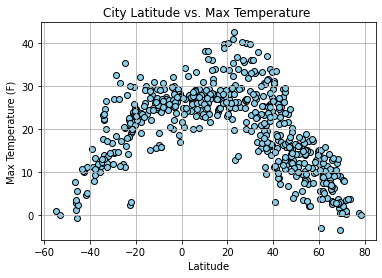

In [9]:
plt.scatter(weather_dataframe['Lat'],weather_dataframe['Max Temp'],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True)
plt.savefig('fig1.png')
plt.show()


From the above plot, it is clear that the temperature for the cities closer to the the equator is higher and it gradually decrease in the cities located away from the equator.  

## Latitude vs. Humidity Plot

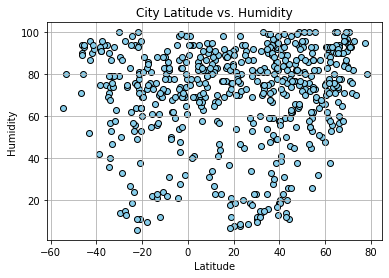

In [10]:
plt.scatter(weather_dataframe['Lat'],weather_dataframe['Humidity'],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (True)
plt.savefig('fig2.png')
plt.show()

The finding from the analysis there is no relationship between Humidity, and latitude but there is a majority of cities that has high humidity in the Northern hemisphere.

## Latitude vs. Cloudiness Plot

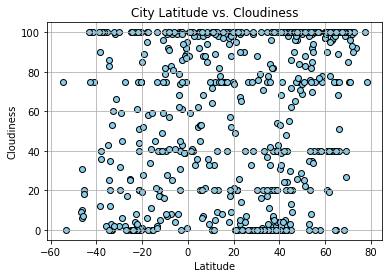

In [11]:
plt.scatter(weather_dataframe['Lat'],weather_dataframe['Cloudiness'],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (True)
plt.savefig('fig3.png')
plt.show()

The finding from the analysis there is no relationship between Cloudiness, and latitude but there is a majority of cities that has high cloudiness in the Northern hemisphere.

## Latitude vs. Wind Speed Plot

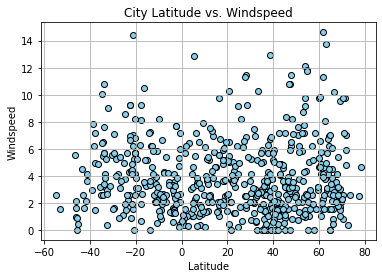

In [12]:
plt.scatter(weather_dataframe['Lat'],weather_dataframe['Wind Speed'],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.grid (True)
plt.savefig('fig4.png')
plt.show()

The finding from the analysis there is no relationship between wind speed (mph), and latitude but overall most of the cities has windspeed in the range 0-6 mph.

## Linear Regression

In [13]:
# Create a Scatter Plot for temperature vs latitude
northern_hemisphere = weather_dataframe.loc[weather_dataframe['Lat'] >=0]
southern_hemisphere = weather_dataframe.loc[weather_dataframe['Lat'] <0]




###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

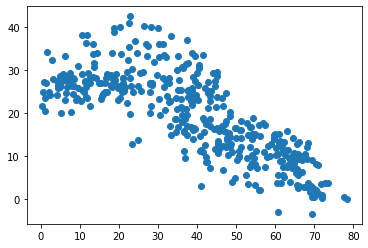

In [14]:

x_values=northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

plt.scatter(x_values,y_values)

plt.show()
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept



In [15]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.39x +34.27


The correlation between both factors is -0.78
The r2value is: 0.6089093947492229


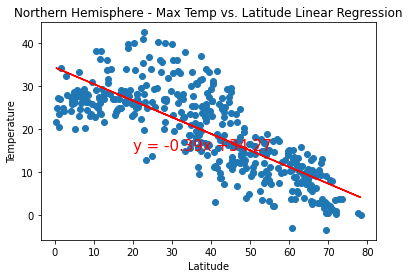

In [16]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.savefig('fig5.png')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Print r value
print(f"The r2value is: {rvalue**2}")

# Show plot
plt.show()


It has been inferred that in Northern Hemisphere there is a negative correlation for Temperature and Latitude. 
There is a good amount of variance identified according to the r2value.



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

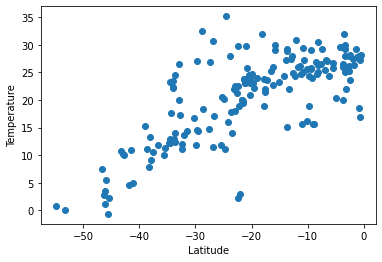

In [17]:
x_values=southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

plt.scatter(x_values,y_values)

plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.show()
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

In [18]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.44x +29.49


The correlation between both factors is 0.74
The r2value is: 0.5548568545830023


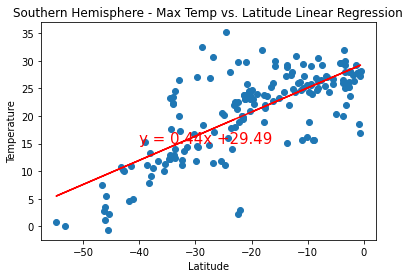

In [19]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(line_eq,(-40,15),fontsize=15,color="red")
plt.savefig('fig6.png')

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Print r value
print(f"The r2value is: {rvalue**2}")

# Show plot
plt.show()



It has been inferred that in Southern Hemisphere there is a negative correlation for Temperature and Latitude. 
There is a good amount of variance identified according to the r2value.

So, cities closer to the Equator are hotter in both Northern and Southern hemispheres.


### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

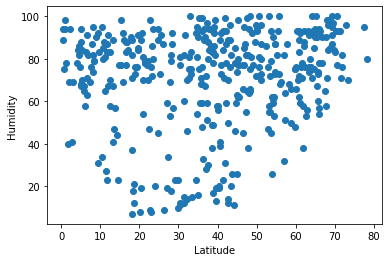

In [20]:
x_values=northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

plt.scatter(x_values,y_values)

plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

In [21]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.17x +64.31


The correlation between both factors is 0.14
The r2value is: 0.020260230525873533


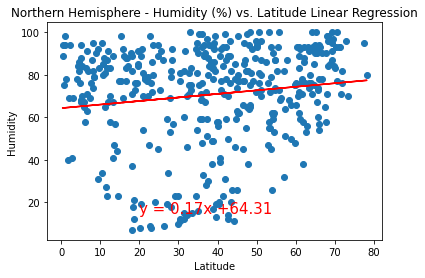

In [22]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.savefig('fig7.png')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Print r value
print(f"The r2value is: {rvalue**2}")

# Show plot
plt.show()


It has been inferred that in Northern Hemisphere  there is a weak positive correlation for  Humidity (%) vs. Latitude. 
There is Little to no variance identified according to the r2value.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

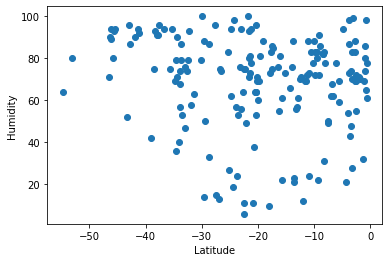

In [23]:
x_values=southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

In [24]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.22x +63.98


The correlation between both factors is -0.13
The r2value is: 0.01699353170750557


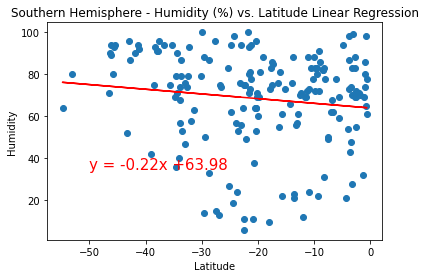

In [25]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.savefig('fig8.png')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Print r value
print(f"The r2value is: {rvalue**2}")

# Show plot
plt.show()


It has been inferred that in Southern Hemisphere  there is a weak negative coorelation for  Humidity (%) vs. Latitude. 
There is Little to no variance identified according to the r2value.

 The correlation between humidity and latitude for both northern and southern hemisphere cities is very weak. Therefore, We can infer that humidity can be fairly distributed in both northern and southern hemisphere cities regardless of their distance from the equator.

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

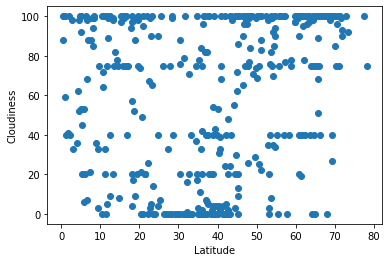

In [26]:
x_values=northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

In [27]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.4x +43.62


The correlation between both factors is 0.2
The r2value is: 0.040348949972496835


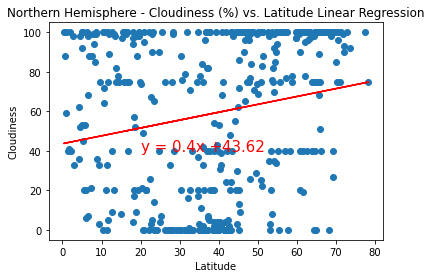

In [28]:

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.savefig('fig9.png')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Print r value
print(f"The r2value is: {rvalue**2}")

# Show plot
plt.show()


It has been inferred that in Northern Hemisphere  there is a weak negative correlation for  Cloudiness vs. Latitude. 
There is Little to no variance identified according to the r2value.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

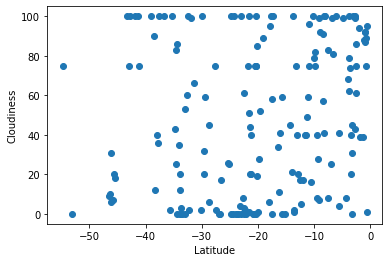

In [29]:
x_values=southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

plt.scatter(x_values,y_values)

plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


In [30]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.54x +58.11


The correlation between both factors is 0.19
The r2value is: 0.03593885808595401


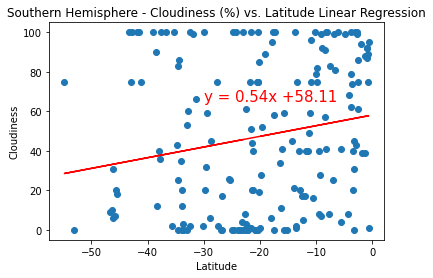

In [31]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(-30,65),fontsize=15,color="red")
plt.savefig('fig10.png')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Print r value
print(f"The r2value is: {rvalue**2}")

# Show plot
plt.show()


It has been inferred that in Southern Hemisphere  there is a weak positive correlation for  Cloudiness vs. Latitude. 
There is Little to no variance identified according to the r2value.

 The correlation between cloudiness and latitude is weak in both Northern and Southern hemispheres. Therefore, We can infer that cloudiness can be fairly distributed in both northern and southern hemisphere cities regardless of their distance from the equator.

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

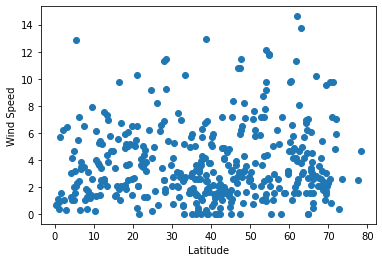

In [32]:
x_values=northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

plt.scatter(x_values,y_values)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

In [33]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.01x +3.18


The correlation between both factors is 0.09
The r2value is: 0.009022328107164421


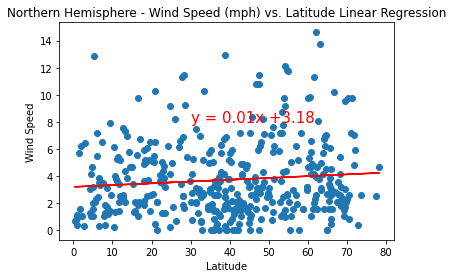

In [34]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(line_eq,(30,8),fontsize=15,color="red")
plt.savefig('fig11.png')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Print r value
print(f"The r2value is: {rvalue**2}")

# Show plot
plt.show()


It has been inferred that in Northern Hemisphere  there is a weak positive correlation for  Windspeed vs. Latitude. 
There is Little to no variance identified according to the r2value.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

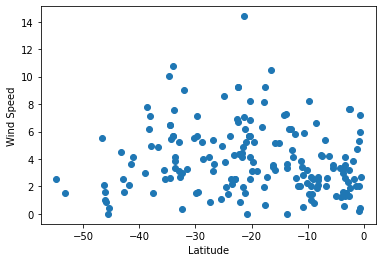

In [35]:
x_values=southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

plt.scatter(x_values,y_values)

plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

In [36]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.02x +3.62


The correlation between both factors is -0.09
The r2value is: 0.00756152313198901


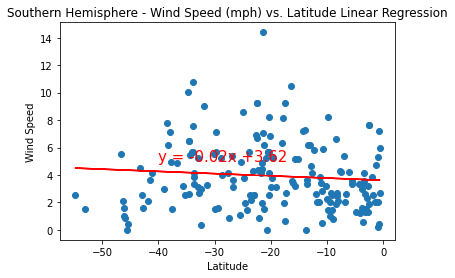

In [37]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(line_eq,(-40,5),fontsize=15,color="red")
plt.savefig('fig12.png')

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Print r value
print(f"The r2value is: {rvalue**2}")
# Show plot
plt.show()



It has been inferred that in Southern Hemisphere  there is a weak positive correlation for  Windspeed vs. Latitude. 
There is Little to no variance identified according to the r2value.

The finding from the analysis of the relationship between wind speed (mph), and latitude showed that the lower wind speed when the cities closer to the equater (latitude 0), and somehow the wind speed increase for the cities farther from the equator.